# 04. 역전파

## 1. 역전파(back-propagation)   
- 역전파는 신경망을 학습시킬 때 이용하는 알고리즘
- 출력값과 정답의 오차를 네트워크에서 역전파시켜 네트워크의 가중치와 bias를 최적화시킴   
=> 최적화하는 과정 : 모델을 학습시키는 것을 의미   
=> 모델 : 정답과 근접한 출력을 얻기 위한 과정에서 발생한 가중치와 bias를 모아둔 것을 의미
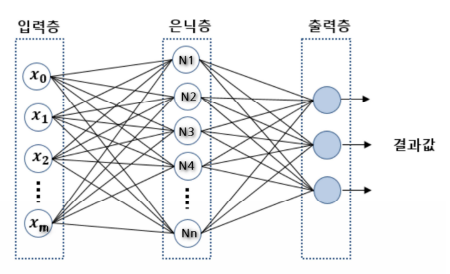

- 순전파(forward propagation)로 얻은 출력값과 정답과의 오차를 하나씩 층을 거슬러 올라가면서 역방향으로 전파
- 이 때 전파시킨 오차에 근거해 각 층의 가중치와 bias의 수정량을 계산
- 모든 층의 가중치와 bias를 조금씩 수정
- 위 과정을 반복하면 네트워크가 최적화(학습)

< 역전파 이해를 위한 항목>
- 훈련 데이터, 테스트 데이터
- 손실 함수
- 경사 하강법
- 최적화 알고리즘
- 배치

## 2. 훈련 데이터, 테스트 데이터   
- 훈련 데이터 : 신경망이 학습에 이용되는 데이터   
  테스트 데이터 : 학습 결과의 검증에 사용되는 데이터
- 각 데이터는 여러 개의 입력값(feature)과 정답으로 구성

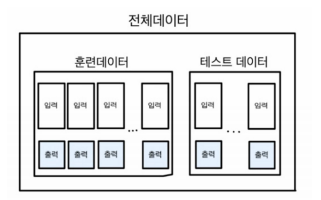   

- 샘플 : 입력값과 정답 한 쌍
- 일반적으로 훈련 데이터의 샘플수가 테스트 데이터의 샘플수보다 월등히 많음
- 훈련 데이터로 학습이 제대로 된 신경망의 경우, 테스트 데이터에서 좋은 결과가 나옴   
(일반화가 잘된 경우)

- 회귀문제의 경우 정답은 다음과 같이 여러 개의 값을 가진 벡터로 나타냄
[0.23, -1.23, 5.44]   
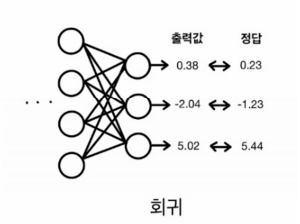
 **그림 맞지 않음 -> 회귀는 출력값 1개, 정답 1개 나와야함**

- 분류 문제의 경우 출력값들 n개 중에 1개의 정답을 얻기 위해 원핫인코딩(One-hot encoding) 형태로 표현함
- 정답 레이블을 샘플마다 n개 만큼 만들어야함(M(1n))
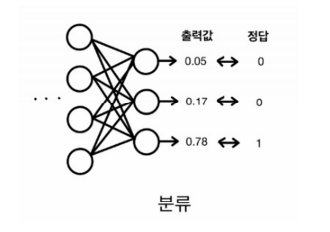

## 3. 손실함수(loss function)   
- 출력값과 정답의 오차를 정의하는 함수

### 1) 평균제곱오차 - MSE(Mean squared error)
- 회귀문제에 주로 사용
- 샘플 수 n / 출력 y / 
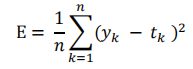

In [1]:
import numpy as np

def mean_squared_error(y, t):
    return np.sum(np.power(y-t, 2)) / y.shape[0]

### 2) 오차제곱합 - SSE(Sum of Squares for Error)
- 회귀문제에 주로 사용
- 1/2 로 나눈 이유는 미분계산을 수월하게 하기 위함
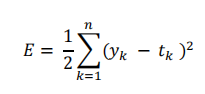

In [2]:
import numpy as np

def square_sum(y, t):
    return 1.0/2.0 * np.sum(np.square(y-t))

### 3) 교차 엔트로피(Cross Entropy)
- 분류 문제에 사용
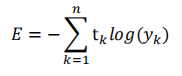 = 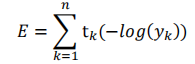

- 분류 문제에서 정답은 1이 하나이고 나머지는 모두 0인 원핫인코딩 벡터로 표현
- 따라서 우변의 시그마 내부에서 tk 가 1인 항의 오차에만 영향을 줌
- y = -log(x) 의 그래프는 다음과 같음

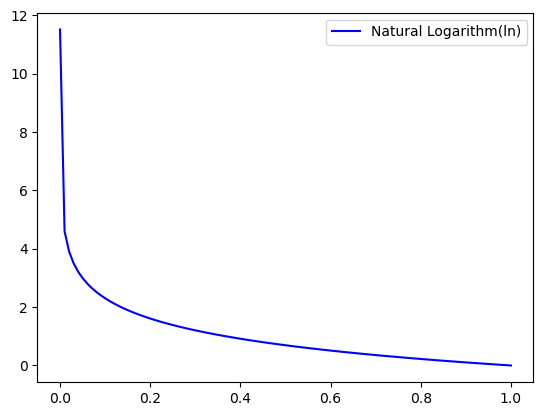

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(start=0.00001, stop=1.0, num=100)
plt.plot(x, -np.log(x), 'b-', label='Natural Logarithm(ln)')

plt.legend()
plt.show()

- x가 1일 때는 0이고, 0에 근접할수록 무한대로 커짐
- 즉 출력 y가 정답에 가까울수록 전체 오차 값은 작아지며, 반대로 정답에서 멀어질수록 한 없이 커짐
- 교차 엔트로피의 장점 중 하나는 출력값과 정답의 차이가 클 수록 학습 속도가 빨라짐

In [7]:
# 파이썬 구현 코드
# log함수의 진수 부분이 0이 되면 무한 발산하여 계산을 수행할 수 없기에
# 이를 방지하기 위해 1e-7(0.0000001) 을 더했음
import numpy as np

def cross_entropy(y, t): # 출력, 정답
    return -np.sum(t * np.log(y + 1e-7))